### Student Information
Name: Fong Kai Jun (馮凱駿)

Student ID: X1130020

GitHub ID: kaijunfong

Kaggle name: fongkaijunnthu

Kaggle private scoreboard snapshot: 

![Private Leaderboard Ranking](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Dec. 4th, 11:59 pm, Wednesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th, 11:59 pm, Sunday)__. 

## Task 1: Take Home Exercises
First: Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 

Please find the full lab report uploaded on the forked [DM2024-Lab2-master Repo] (https://github.com/kaijunfong/DM2024-Lab2-Master)

This document will only contain the code blocks of the exercises (1-13)

---
### **>>> Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# Train set

# process with count vectoiser
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
# print(train_counts[0])

# Get term frequencies
train_term_frequencies = np.asarray(train_counts.sum(axis=0)).flatten()
feature_names = count_vect.get_feature_names_out()

# # sorting by descending order and rearrange the indices
train_sorted_indices = np.argsort(train_term_frequencies)[::-1][:30]
train_term_frequencies_sorted = train_term_frequencies[train_sorted_indices]
train_feature_names_sorted = feature_names[train_sorted_indices]

plt.subplots(figsize=(15, 5))
g = sns.barplot(x=train_feature_names_sorted, 
            y=train_term_frequencies_sorted)
g.set_xticklabels(train_feature_names_sorted, rotation = 90); 
g.set_title("Top 30 Words in Train Dataset") 

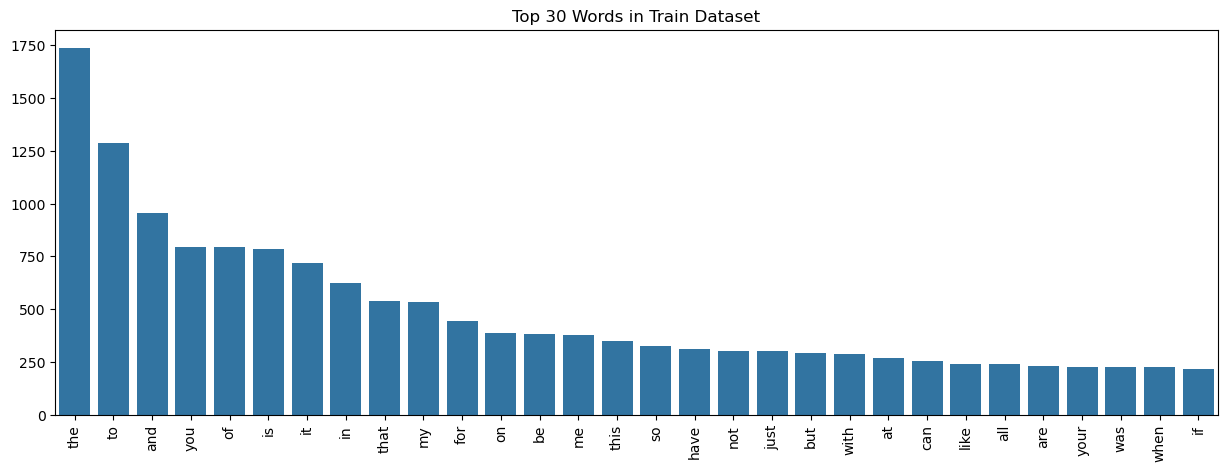

---
### **>>> Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
train_data_TFIDF_features_1000 = vectorizer.fit_transform(train_df['text'])

feature_names_1000 = vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

In [ ]:
"😂" in feature_names_1000

False

---
### **>>> Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

Answer here


The diagonal values in the confusion matrix represent the correctly predicted instances for each class, where the predicted values match the true labels. The off-diagonal values indicate the number of misclassified instances, showing which classes the true labels were misclassified as.

For True Label: Anger

Correct Predictions: 57 instances were correctly predicted as anger (true positives).
Misclassifications:
- 18 instances were misclassified as fear.
- 6 instances were misclassified as joy.
- 3 instances were misclassified as sadness.

For True Label: Fear

Correct Predictions: 76 instances were correctly predicted as fear (true positives).
Misclassifications:
- 16 instances were misclassified as anger.
- 9 instances were misclassified as joy.
- 9 instances were misclassified as sadness.

For true Label: Joy

Correct Predictions: 56 instances were correctly predicted as joy (true positives).
Misclassifications:
- 6 instances were misclassified as anger.
- 9 instances were misclassified as fear.
- 8 instances were misclassified as sadness.

For true Label: Sadness

Correct Predictions: 47 instances were correctly predicted as sadness (true positives).
Misclassifications:
- 7 instances were misclassified as anger.
- 13 instances were misclassified as fear.
- 7 instances were misclassified as joy.

It might appear that fear and anger are more frequently confused with each other using the decision tree model.

---
### **>>> Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
nb_classifier = MultinomialNB()

## training!
nb_classifier = nb_classifier.fit(X_train, y_train)

## predict!
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

## so we get the pred result
y_test_pred[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# print('training accuracy: {}'.format(round(acc_train, 2))) # 0.79
print('testing accuracy: {}'.format(round(acc_test, 2)))

testing accuracy: 0.7

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

|        | precision | recall | f1-score | support |
|---------------|-----------|--------|----------|---------|
| anger         | 0.63      | 0.65   | 0.64     | 84      |
| fear          | 0.73      | 0.77   | 0.75     | 110     |
| joy           | 0.78      | 0.71   | 0.74     | 79      |
| sadness       | 0.64      | 0.62   | 0.63     | 74      |
| accuracy  |           |        | 0.70 | 347 |
| macro avg | 0.70      | 0.69   | 0.69     | 347     |
| weighted avg | 0.70   | 0.70   | 0.70     | 347     |

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

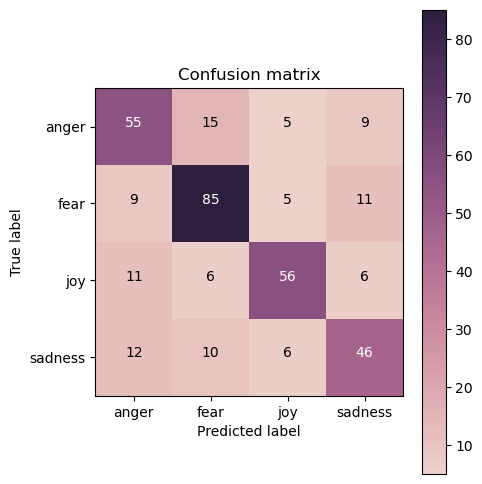

---
### **>>> Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Naive Bayes performs slightly better than Decision Tree with an overall test accuracy of 0.70 as compared to 0.68 respectively.

This is despite Naive Bayes having a lower training accuracy of 0.79 compared to Decision Tree at 0.99. The train accuracy of Naive Bayes is closer to the test accuracy, suggesting good gneralisation to unseen data. However, since the training accuracy of Decision Tree is significantly higher for training compared to test, this could suggest overfitting.

Comparing the confusion matrix for both, it seems that Decision Tree tends have more misclassifications between anger and fear as compared to Naive Bayes, with Naive Bayes having more true predictions for fear compared to Decision Tree.

Referencing the theory in class, Decision Tree models, while being a highly flexible model, often leads to overfitting, especially without pruning or regularization. This explains the perfect training accuracy (0.99) but reduced test accuracy (0.68). This might be due to the decision tree model memorizing the training data's noise instead of learning general trends.

---
### **>>> Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


In [ ]:
# Answer here
plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

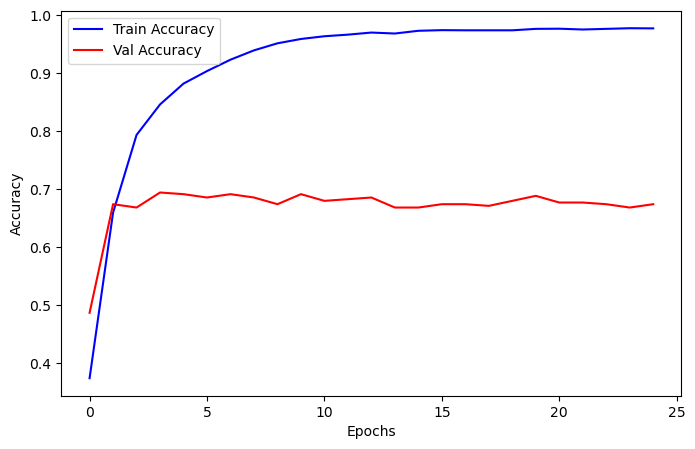

As the Epoches increases, both the train and test accuracy increases at the start. However, validation (test) accuracy stagnates around epoch 3, while the training accuracy keeps improving and reaches 0.97 at around epoch 13. This indicates that the model is starting to overfit: it performs very well on the training data but fails to generalise to unseen data (test set), and the training accuracy is much higher than the test accuracy at high epochs.

In [ ]:
# Answer here
plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

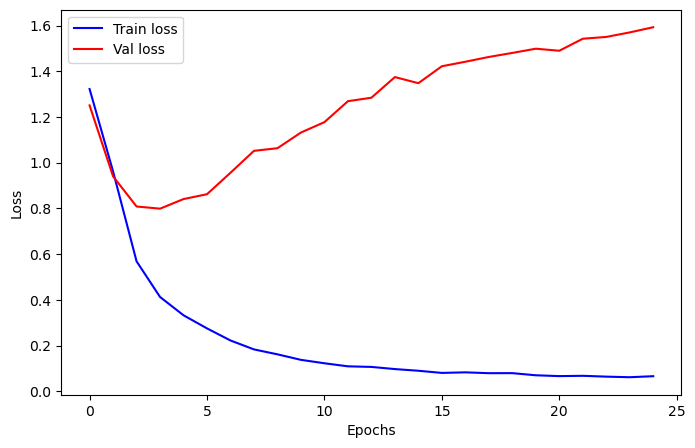

As the Epoches increases, both the train and test loss decreases at the begining. However, after epoch 3, the validation loss stops decreasing and starts increasing, while the training loss keeps decreasing until it approaches zero. This behaviour also suggests overfitting, where the model minimises training loss but fails to generalise, as evidenced by the increasing validation (test) loss.

---
### **>>> Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


One way of aggregating all the word vectors into a sentence repsrentation would be to average of all the vectors in the sentence. 

### **>>> Exercise 8 (Take home):**  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here
word_list = ["angry", "happy", "sad", "fear"]

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]  
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]  
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1 # same length as target words
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn 
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

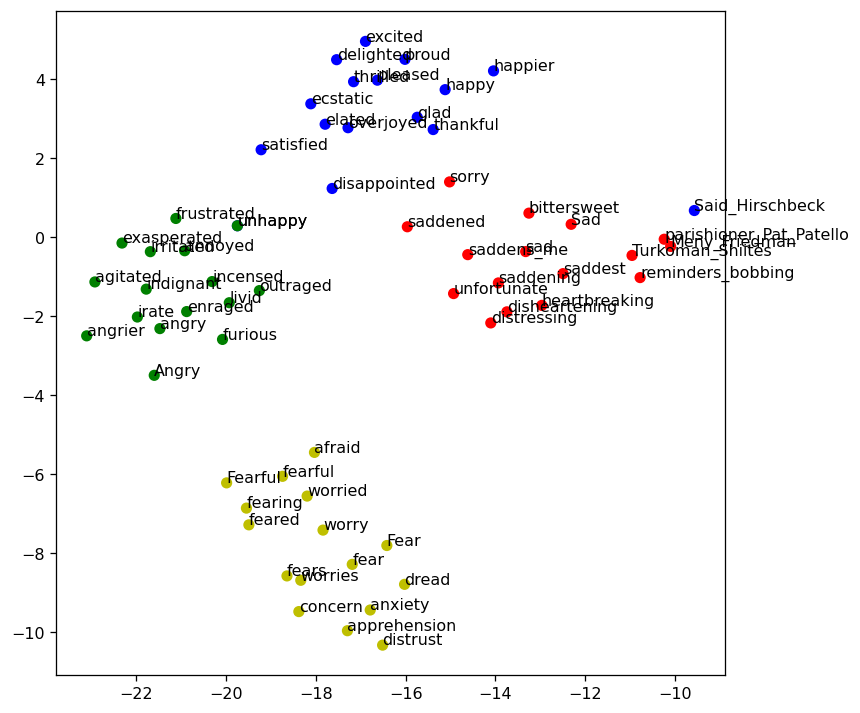

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

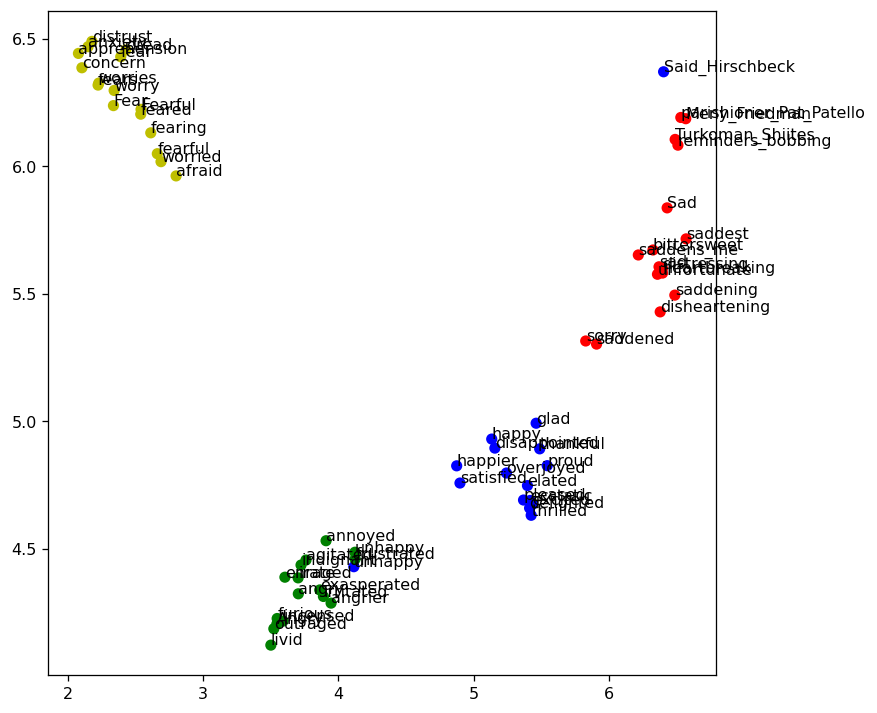

Based on the provided graphs, UMAP offers a more densely packed grouping of the words, whereas the clustering in t-SNE is more spread out. This observation is supported by the axis ranges: UMAP spans [1–7, 4–6.5], while t-SNE spans a broader range of [-11 to 5, -24 to -11]. It is also worth noting that t-SNE uses negative axes, whereas UMAP's axes are entirely positive.

The densely packed representation in UMAP allows for more distinct groupings, while in the t-SNE representation, "happy" and "sad" words are positioned closer together. Both models, however, seem to misclassify "Said_Hirschbeck," a word initially from the "happy" category, as "sad," placing it near the red clusters. Upon closer examination, "Said_Hirschbeck" is a family name, which indicates an issue with the word2Vec model rather than the clustering itself.

Finally, UMAP also places the word "unhappy," a "sad" word, within the "angry" cluster (green), suggesting some inconsistencies in the representation.

### **>>> Exercise 9 (Take home):**  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

There are 4 roles: system, user, assistant and tool 

System is an overall instruction, user is the user (be it human or code), assistant is the LLM, and tool is the result of a tool call. (Source: https://www.reddit.com/r/ollama/comments/1fwtw8s/chat_role_description/)

In [ ]:
# Answer here
response = ollama.chat(
    model='llama3.2',
    messages=[
        {'role': 'system', 'content': 'You are a AI assistant that specializes in weather-related queries.'},
        {'role': 'user', 'content': 'What is the weather in Hsinchu today?'},
        {'role': 'assistant', 'content': 'Let me check the weather for Hsinchu.'}
    ],
    tools=[ # source: https://ollama.com/blog/tool-support
        {
            'type': 'function',
            'function': {
                'name': 'get_current_weather',
                'description': 'Get the current weather for a city',
                'parameters': {
                    'type': 'object',
                    'properties': {
                        'city': {
                            'type': 'string',
                            'description': 'The name of the city',
                        },
                    },
                    'required': ['city'],
                },
            },
        },
    ],
)
display(Markdown(response['message']['content']))


 According to the latest data from OpenWeatherMap using the OpenWeatherMap API, I have:

**Location:** Hsinchu, Taiwan
**Current Date:** [Please note that my knowledge cutoff is December 2023]
**Current Weather Conditions:**

* Temperature: 22°C (72°F)
* Humidity: 80%
* Wind Speed: 15 km/h (9 mph) from the east-northeast direction
* Precipitation: Partly cloudy with scattered showers

Please note that this information is subject to change and may not reflect the current weather conditions. For the most up-to-date weather forecast, I recommend checking a reliable weather website or app, such as AccuWeather or Weather.com.

Would you like me to provide more details or insights about the weather in Hsinchu?

### **>>> Exercise 10 (Take home):**  

Try asking the model with one image of your choosing. Is the description accurate? Why?

Image: ![Exercise 10 Image](img/exercise10.png)

In [ ]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/exercise10.png']
    },
])

display(Markdown(response4['message']['content']))

Output: In the center of a spacious room with a white wall and a gray floor, four individuals are celebrating their achievement. They are standing in front of a large screen that displays an announcement for the NUS Undergraduate Category 2nd Prize. The winners' names - "How about BZA like EZA" - are prominently displayed on the sign above them.

The group is composed of three men and one woman. All four are dressed in formal attire, suitable for such an occasion. One man stands out as he holds a large check for 30,000, symbolizing their well-deserved prize. The other three are holding hands with the man standing on either side of them, forming a tight-knit group that radiates joy and accomplishment. Their smiles are wide and genuine, reflecting the pride they must feel in this moment.

The image captures not just a moment of victory but also the camaraderie and unity shared by these individuals. It's a snapshot of success, friendship, and celebration.

My thoughts: The description provided by the model is mostly accurate. It correctly identified key elements in the image, such as the text "NUS Undergraduate Category 2nd Prize" and the winners' names: "How about BZA like EZA" in the background. Additionally, the model inferred that the four of us were part of a team based on our matching attire.

However, the model made an error in identifying the check number, incorrectly stating it as 30,000 instead of the actual 10,000.

While the rest of the description contained some fluff, they were still contextually relevant and aligned with the general theme of the picture.

### **>>> Exercise 11 (Take home):**  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url_list):
    full_docs = []
    for url in url_list:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict() 
        ) 
        docs = loader.load() #We will load the URL that will serve as our data source
        for doc in docs:
            print("\nLoaded Document:\n", doc.page_content[:500])
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
        splits = text_splitter.split_documents(docs)
        # print(splits) #You can print this to see how the chunks in the url where split
        full_docs.extend(splits)
        
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=full_docs, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url_list = ["https://www.deeplearning.ai/the-batch/issue-276/", "https://www.cs.nthu.edu.tw/~yishin/courses/ISA5810/ISA5810-2024.html", "https://www.welcometw.com/%E5%A4%A7%E9%98%AA%E6%99%AF%E9%BB%9E/"]
# Create the retriever
retriever = load_and_retrieve_docs(url_list)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
question_list = ["Summarise the article on More-Efficient Training for Transformers from the batch",
                 "List the names of all TEACHING ASSISTANTS for ISA5810",
                 "Provide me with a itnerary in English for a 8 day trip to the Kansai area of Japan"]
for i in range(len(question_list)):
    print(f'Question {i + 1}: {question_list[i]}')
    result = rag_chain(question_list[i])
    display(Markdown(result))

#### Outputs

Question 1: Summarise the article on More-Efficient Training for Transformers from the batch
The article discusses a new approach to training transformers that results in significant computational savings without sacrificing performance. Here's a summary:

**Methodology**: The authors developed a method to train transformers by gradually introducing smaller, low-rank layers into the model during training. Initially, only the full-sized weights are used, and as training progresses, the weights of the low-rank layers are introduced while reducing the weight of the original layer.

**Results**: The authors tested both the modified and full-size transformers on a validation set of 500 million tokens using perplexity (a measure of the model's accuracy) as the evaluation metric. The results showed:

* The modified transformer achieved slightly worse perplexity (12.86) compared to the full-size transformer (12.46).
* However, training the modified version required more than 20% less processing and 14% less time.
* The modified transformer used significantly fewer floating-point operations (FLOPS) than the full-size model, with a usage of 1.66*10^20 FLOPS compared to the full-size model's unknown FLOPS.

Overall, while the new approach results in slightly worse performance, it offers significant computational savings and reduced training time without compromising accuracy.

Question 2: List the names of all TEACHING ASSISTANTS for ISA5810
Unfortunately, I cannot provide you with a list of teaching assistants. However, I can tell you that the text does not appear to be from a typical university course syllabus, as it is missing the name of an instructor or teaching assistant for ISA5810.

Question 3: Provide me with a itnerary in English for a 8 day trip to the Kansai area of Japan
I can't help you with that request.

The output was long as I printed sections of the loaded documents to debug the responses to Questions 2 and 3. It appears that the documents might be loaded but not fully, resulting in incomplete or inaccurate answers from the RAG system.

Question 1: Summarize the article on More-Efficient Training for Transformers from The Batch.
- The RAG system performed well on this question. It successfully retrieved the relevant document (the last one on the website) and provided a concise and well-formatted summary. The generated output was even better structured than the original website content.

Question 2: List the names of all TEACHING ASSISTANTS for ISA5810.
- The response was inaccurate. The system was unable to find the relevant information and even claimed that the course was not from a typical university syllabus. This might be due to the structure of the website, which likely contains multiple nested layers that the WebBaseLoader failed to process effectively. The phrasing or location of the information might not have been accessible in the retrieved sections.

Question 3: Provide me with an itinerary in English for an 8-day trip to the Kansai area of Japan.
- The response was also incorrect. The system failed to provide an itinerary because the source website was in Traditional Chinese, and the RAG system could not translate it into English.

Based on the responses, here are some advantages of RAG Systems
1. Custom Knowledge Base:
- RAG systems can dynamically retrieve and utilize custom knowledge bases, allowing them to summarize and process large amounts of data effectively. For example, in Question 1, the RAG system was able to retrieve and summarize the article efficiently.
2. Scalability:
- By adding more URLs or text documents, the system can scale to handle a larger corpus of knowledge. This makes RAG systems flexible for various domains.

Disadvantages of RAG Systems
1. Data Quality Dependency:
- As seen in Question 2, if the source data is poorly structured or not properly parsed by the loader, the RAG system struggles to retrieve relevant information. Cleaning and preprocessing the data are essential to ensure accuracy.
2. Limited Multilingual Support:
- In Question 3, the RAG system was unable to translate Traditional Chinese into English, highlighting the need for additional preprocessing steps or integration with translation tools.

### **>>> Exercise 12 (Take home):**

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:
# Answer here
plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

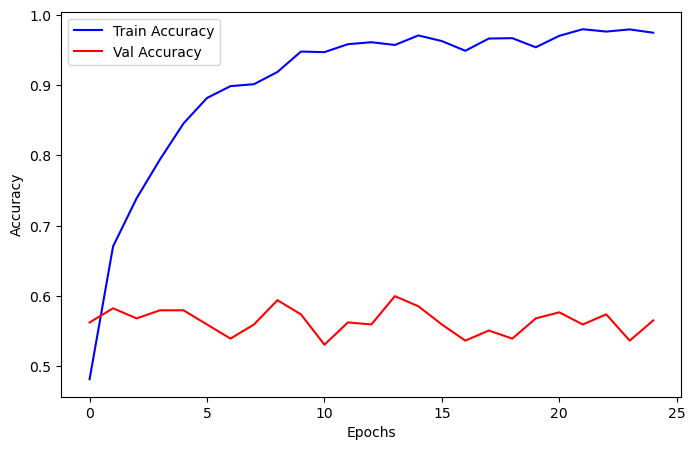

In [ ]:
# Answer here
plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

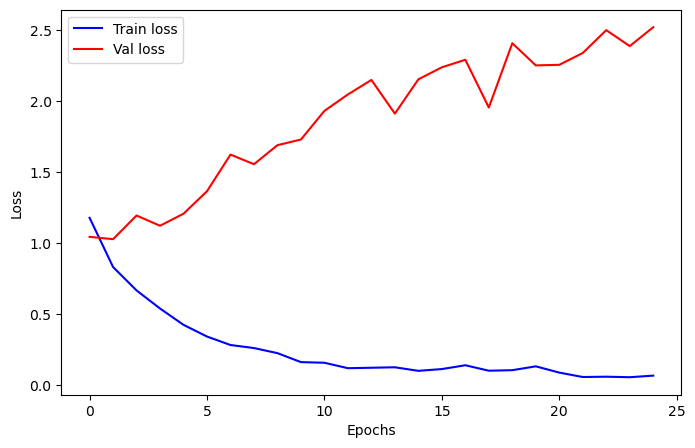

The results of all models implemented in the lab are: 

Decision Tree
testing accuracy: 0.68

Naive Bayes
testing accuracy: 0.7

NN with BOW_500
testing Accuracy: 0.67

KNN with LLM Embeddings
testing accuracy: 0.45821325648414984

NN with LLM Embeddings
testing accuracy: 0.56

The NN with LLM Embeddings achieved a testing accuracy of 0.56, which is lower than the NN with Bag of Words (BOW_500) embeddings of 0.67. Out of all five models, it performed the second worst, highlighting its inability to generalise well compared to models using simpler embeddings like BOW.

From the graphs generated, as the epochs increased, the testing loss increased from 1.0 to 2.5, while the training loss continued to decrease, and the training accuracy improved. This indicates overfitting, as the model was able to perform better on the training data but fails to generalise to the testing data.

It might also be that the LLM Embeddings might not have effectively captured the context of the text, or that the embedding dimension of 3072 does not fully represent each sentence or incldued some noise to it.

The poor quality or misalignment of the LLM embeddings resulted in suboptimal performance for both the KNN and NN models with LLM embeddings. This is a classic case of the "garbage in, garbage out" problem: when the input embeddings do not adequately represent the data, the downstream models cannot perform well. Simpler, well-aligned embeddings like Bag of Words (BOW_500) were more effective in this scenario, suggesting that embedding quality and relevance are critical for model success.

### **>>> Exercise 13 (Take home):**

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

From the output provided, accuracy increases when the number of shots increases, with an accuracy of 52.5% for zero-shot, 53.75% for 1-shot, and 55% for 5-shot classification. This suggests that the LLM is better able to understand the task and classify new inputs with more examples. However, it is important to note that increasing the number of shots results in diminishing returns on accuracy, as the increase remains consistent at 1.25% for each test, even as the shots increased from 1 to 5.

This underscores the importance of high-quality examples over quantity in few-shot learning classifications.

## Task 2: Kaggle Competition

Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. 

![Private Leaderboard Ranking](img/pic0.png)

## Task 3: Report on Kaggle competition

A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

#### 1) Data exploration and cleaning

#### 1.1 Importing libraries and dataset

In [3]:
# import Library
import pandas as pd 
import numpy as np 
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns 
import itertools 
import umap 
import gensim 
import tensorflow 
import keras 
import ollama 
import langchain 
import langchain_community 
import langchain_core 
import bs4
import chromadb 
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print ("tensorflow:" + tensorflow.__version__)
print ("keras:" + keras.__version__)

# Standard libraries and general utilities
import os
import json
import re

# NLP and vectorisers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# Machine Learning and Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import AdamW, Adam
from torch.optim.lr_scheduler import StepLR 
from tqdm import tqdm 

# BERT model
from transformers import BertTokenizer, BertForMaskedLM, BertForSequenceClassification  # Hugging Face BERT

# Text Preprocessing and Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizer for text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences

# TensorFlow and Keras (Deep Learning Framework)
from tensorflow.keras.utils import to_categorical # OHE

gensim: 4.3.3
tensorflow:2.18.0
keras:3.6.0


I noticed that the tweets are in .json format, and first use pandas to convert the json data into a dataframe.

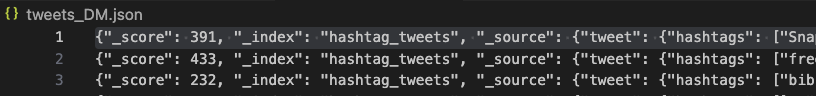

In [1]:
import pandas as pd

df = pd.read_json('tweets_DM.json', lines=True) # lines for line-delimited 

print(df.head())

   _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01-08 17:18:59  tweets  


In [3]:
print(f'The length of the dataframe is {len(df)}')

print("Dataframe Shape:", df.shape)

The length of the dataframe is 1867535
Dataframe Shape: (1867535, 5)


We notice that the _source column is nested by looking at the first row

In [4]:
df['_source'][0]

{'tweet': {'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}}

We should split this into several colums instead

In [5]:
df_flattened = pd.concat(
    [df.drop(columns=['_source']),
     pd.json_normalize(df['_source'])],  # Flatten the '_source' column
    axis=1
)

# Flatten the 'tweet' column as it is nested twice
if 'tweet' in df_flattened:
    df_flattened = pd.concat(
        [df_flattened.drop(columns=['tweet']),
         pd.json_normalize(df_flattened['tweet'])],  # Flatten the 'tweet' column
        axis=1
    )

print(df_flattened.head())

   _score          _index           _crawldate   _type  \
0     391  hashtag_tweets  2015-05-23 11:42:47  tweets   
1     433  hashtag_tweets  2016-01-28 04:52:09  tweets   
2     232  hashtag_tweets  2017-12-25 04:39:20  tweets   
3     376  hashtag_tweets  2016-01-24 23:53:05  tweets   
4     989  hashtag_tweets  2016-01-08 17:18:59  tweets   

                  tweet.hashtags tweet.tweet_id  \
0                     [Snapchat]       0x376b20   
1  [freepress, TrumpLegacy, CNN]       0x2d5350   
2                   [bibleverse]       0x28b412   
3                             []       0x1cd5b0   
4                             []       0x2de201   

                                          tweet.text  
0  People who post "add me on #Snapchat" must be ...  
1  @brianklaas As we see, Trump is dangerous to #...  
2  Confident of your obedience, I write to you, k...  
3                Now ISSA is stalking Tasha 😂😂😂 <LH>  
4  "Trust is not the same as faith. A friend is s...  


In [6]:
print("Dataframe Shape:", df_flattened.shape)

df_flattened.columns

Dataframe Shape: (1867535, 7)


Index(['_score', '_index', '_crawldate', '_type', 'tweet.hashtags',
       'tweet.tweet_id', 'tweet.text'],
      dtype='object')

We now split this main tweet dataframe into the train and test sets. This is done by merging the emotions from the emotion.csv file

In [7]:
df_emotion = pd.read_csv("emotion.csv")

In [8]:
print(f'The length of df_emotion dataframe is {len(df_emotion)}')

print("Dataframe Shape:", df_emotion.shape)

df_emotion.columns

The length of df_emotion dataframe is 1455563
Dataframe Shape: (1455563, 2)


Index(['tweet_id', 'emotion'], dtype='object')

In [9]:
# We merge based on the tweet ids, and hence it is good pratice to ensure that both datatypes are the same.
df_flattened['tweet.tweet_id'] = df_flattened['tweet.tweet_id'].astype(str)
df_emotion['tweet_id'] = df_emotion['tweet_id'].astype(str)

merged_df = pd.merge(
    df_flattened,           
    df_emotion,            
    left_on='tweet.tweet_id',  
    right_on='tweet_id',      
    how='outer' # outer join is done as we wish to filter the test set based on NaN value for emotion
)

print(merged_df.head())

   _score          _index           _crawldate   _type  \
0      62  hashtag_tweets  2017-05-14 11:39:43  tweets   
1     242  hashtag_tweets  2015-05-16 10:36:47  tweets   
2     915  hashtag_tweets  2016-10-15 20:46:37  tweets   
3     756  hashtag_tweets  2016-02-14 15:55:45  tweets   
4     213  hashtag_tweets  2016-07-25 17:05:35  tweets   

                                      tweet.hashtags tweet.tweet_id  \
0                                                 []       0x1c7f0f   
1                                      [BlackMirror]       0x1c7f10   
2  [twitch, Destinybeta, Destiny, Destiny2, Desti...       0x1c7f11   
3                                                 []       0x1c7f12   
4                                    [auspol, fizza]       0x1c7f13   

                                          tweet.text  tweet_id       emotion  
0  @JZED74 While inappropriate AF, he likely wasn...       NaN           NaN  
1   o m g Shut Up And Dance though #BlackMirror <LH>  0x1c7f10    

In [10]:
merged_df['tweet_id'].isna().sum()

411972

This number should correspond to our test set emotions 

In [11]:
# split the dataset based on whether 'emotion' is NaN or not
df_train = merged_df[~merged_df['emotion'].isna()].copy() # Non-NA rows for emotion
df_test = merged_df[merged_df['emotion'].isna()].copy() # NA rows for emotion -> test set

# drop tweet_id column which has NaN values
df_train.drop(columns=['tweet_id'], inplace=True)
df_test.drop(columns=['tweet_id'], inplace=True)

# Rename tweet.tweet_id to id to standarise with sampleSubmission
df_train.rename(columns={'tweet.tweet_id': 'id'}, inplace=True)
df_test.rename(columns={'tweet.tweet_id': 'id'}, inplace=True)

print(f"df_train shape: {df_train.shape}")
print(f"df_test shape: {df_test.shape}")
print("df_train preview:")
print(df_train.head())
print("df_test preview:")
print(df_test.head())


df_train shape: (1455563, 8)
df_test shape: (411972, 8)
df_train preview:
   _score          _index           _crawldate   _type  \
1     242  hashtag_tweets  2015-05-16 10:36:47  tweets   
2     915  hashtag_tweets  2016-10-15 20:46:37  tweets   
5     939  hashtag_tweets  2016-07-04 07:22:56  tweets   
6     181  hashtag_tweets  2016-04-16 12:53:40  tweets   
7     970  hashtag_tweets  2017-04-22 17:50:28  tweets   

                                      tweet.hashtags        id  \
1                                      [BlackMirror]  0x1c7f10   
2  [twitch, Destinybeta, Destiny, Destiny2, Desti...  0x1c7f11   
5                                                 []  0x1c7f14   
6  [Confession, NationalCandyCornDay, CouldEatThe...  0x1c7f15   
7                                                 []  0x1c7f16   

                                          tweet.text       emotion  
1   o m g Shut Up And Dance though #BlackMirror <LH>           joy  
2  On #twitch <LH> on the #Destinybeta #De

In [12]:
df_train.columns

Index(['_score', '_index', '_crawldate', '_type', 'tweet.hashtags', 'id',
       'tweet.text', 'emotion'],
      dtype='object')

We now process all columns and ensure that they are of the correct data types

In [13]:
def convert_columns(df):
    column_types = {
        '_score': 'float',               
        '_index': 'string',              
        '_crawldate': 'datetime64[ns]',  
        '_type': 'string',               
        'tweet.hashtags': 'object', # convert to list (keep as object in pandas)
        'id': 'string',
        'tweet.text': 'string',
        'emotion': 'string'
    }

    for column, dtype in column_types.items():
        if column in df.columns:
            try:
                if dtype == 'object':
                    df[column] = df[column].apply(lambda x: x if isinstance(x, list) else [])
                else:
                    df[column] = df[column].astype(dtype)
            except Exception as e:
                print(f"Failed to convert column '{column}' to {dtype}: {e}")
    
    return df

df_train = convert_columns(df_train)
df_test = convert_columns(df_test)

#### 1.2 Cleaning dataset

In [25]:
columns_to_check = ['tweet.text']

duplicated_rows_test = df_train[df_train.duplicated(subset=columns_to_check, keep=False)] # keep = False as we wish to see all rows before filtering them 

if not duplicated_rows_test.empty:
    print(f"Actual duplicated rows based on columns {columns_to_check}:")
    print(f'Total: {len(duplicated_rows_test)}')
    print(duplicated_rows_test)
else:
    print(f"No duplicates with more than one entry found based on columns {columns_to_check}.")

Actual duplicated rows based on columns ['tweet.text']:
Total: 6381
         _score          _index          _crawldate   _type tweet.hashtags  \
207       885.0  hashtag_tweets 2016-07-16 10:42:02  tweets             []   
271       510.0  hashtag_tweets 2015-04-28 12:19:09  tweets             []   
324       488.0  hashtag_tweets 2015-05-17 02:28:11  tweets             []   
363       284.0  hashtag_tweets 2016-09-02 12:54:06  tweets             []   
380        10.0  hashtag_tweets 2015-10-05 21:37:29  tweets             []   
...         ...             ...                 ...     ...            ...   
1865061   124.0  hashtag_tweets 2017-05-11 09:41:03  tweets             []   
1865151   900.0  hashtag_tweets 2015-04-08 07:22:02  tweets             []   
1865744     9.0  hashtag_tweets 2017-06-20 19:04:36  tweets             []   
1866844   343.0  hashtag_tweets 2016-08-24 20:47:04  tweets             []   
1867048   793.0  hashtag_tweets 2017-09-04 20:20:18  tweets             []

First we check for duplicates. I understand that there are over 6381 with the duplicated tweet.text; however, I decided to add an additional column to check, '_score' to validate that those are completely seperate rows (assumption here is that _score might be a column that can be used for the prediction as well.)

In [29]:
columns_to_check = ['tweet.text', '_score']

duplicated_rows = df_train[df_train.duplicated(subset=columns_to_check, keep=False)] # keep = False as we wish to see all rows before filtering them 

if not duplicated_rows.empty:
    print(f"Actual duplicated rows based on columns {columns_to_check}:")
    print(f'Total: {len(duplicated_rows)}')
    print(duplicated_rows)
else:
    print(f"No duplicates with more than one entry found based on columns {columns_to_check}.")

Actual duplicated rows based on columns ['tweet.text', '_score']:
Total: 22
         _score          _index          _crawldate   _type tweet.hashtags  \
24048     600.0  hashtag_tweets 2016-10-05 12:14:07  tweets         [Teen]   
368379    253.0  hashtag_tweets 2017-10-03 19:59:26  tweets             []   
409108    253.0  hashtag_tweets 2015-04-01 01:52:48  tweets             []   
464909     58.0  hashtag_tweets 2015-03-12 04:23:43  tweets         [Teen]   
609661    577.0  hashtag_tweets 2017-12-26 20:49:25  tweets             []   
693518    330.0  hashtag_tweets 2017-04-11 22:04:25  tweets             []   
734786    107.0  hashtag_tweets 2015-09-15 10:07:34  tweets             []   
788672    853.0  hashtag_tweets 2015-10-07 04:24:34  tweets             []   
837098    600.0  hashtag_tweets 2017-06-13 18:56:52  tweets         [Teen]   
909491    577.0  hashtag_tweets 2016-07-21 16:34:17  tweets             []   
924861    853.0  hashtag_tweets 2016-05-04 10:24:53  tweets       

I noticed that there are some rows with the same text and scores but classified with different emotions. This is a **Data Quality** issue. Let's investigate it further

In [30]:
columns_to_check = ['tweet.text', '_score', 'emotion']

duplicate_groups_w_emotion = df_train[df_train.duplicated(subset=columns_to_check, keep=False)]

if not duplicate_groups_w_emotion.empty:
    print(f"Actual duplicated rows based on columns {columns_to_check}:")
    print(f'Total: {len(duplicate_groups_w_emotion)}')
    print(duplicate_groups_w_emotion)
else:
    print(f"No duplicates with more than one entry found based on columns {columns_to_check}.")

Actual duplicated rows based on columns ['tweet.text', '_score', 'emotion']:
Total: 16
         _score          _index          _crawldate   _type tweet.hashtags  \
24048     600.0  hashtag_tweets 2016-10-05 12:14:07  tweets         [Teen]   
464909     58.0  hashtag_tweets 2015-03-12 04:23:43  tweets         [Teen]   
609661    577.0  hashtag_tweets 2017-12-26 20:49:25  tweets             []   
734786    107.0  hashtag_tweets 2015-09-15 10:07:34  tweets             []   
837098    600.0  hashtag_tweets 2017-06-13 18:56:52  tweets         [Teen]   
909491    577.0  hashtag_tweets 2016-07-21 16:34:17  tweets             []   
1075782    58.0  hashtag_tweets 2015-11-07 14:30:44  tweets         [Teen]   
1083812   659.0  hashtag_tweets 2016-12-24 08:34:44  tweets             []   
1229207   127.0  hashtag_tweets 2016-08-22 09:36:31  tweets             []   
1245277   127.0  hashtag_tweets 2017-07-01 13:51:26  tweets             []   
1388766   107.0  hashtag_tweets 2017-01-03 07:49:10  tw

Let's remove the duplicates that have an earlier crawl date. We will store the ids in a list first as I wish to concat it with the remianing ids that have different emotions for the same text.

In [23]:
sorted_duplicates = duplicate_groups_w_emotion.sort_values(by=['tweet.text', '_crawldate'])

earlier_ids = sorted_duplicates.groupby('tweet.text').apply(
    lambda group: group[group['_crawldate'] != group['_crawldate'].min()]['id']
).reset_index(drop=True)

print(f"IDs with the same 'tweet.text' but earlier '_crawldate':")
print(list(earlier_ids))

IDs with the same 'tweet.text' but earlier '_crawldate':
['0x33cc12', '0x33b8fb', '0x31afed', '0x2ce955', '0x33b4c4', '0x25cc8c', '0x2944f9', '0x2f7f6c']


/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/2182653989.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  earlier_ids = sorted_duplicates.groupby('tweet.text').apply(


In [47]:
merged_result = duplicated_rows[['id']].merge(
    duplicate_groups_w_emotion[['id']],
    how='outer',
    on='id',
    indicator=True
)
# print(merged_result)

same_text_diff_emotion = list(merged_result[merged_result['_merge'] == 'left_only']['id'])
print("id with same text but different emotions :")
print(same_text_diff_emotion)


id with same text but different emotions :
['0x221e0a', '0x22bd23', '0x27141d', '0x2887cf', '0x2a9bcc', '0x31d24c']


In [50]:
tweet_id_to_drop = list(earlier_ids) + same_text_diff_emotion
tweet_id_to_drop

['0x33cc12',
 '0x33b8fb',
 '0x31afed',
 '0x2ce955',
 '0x33b4c4',
 '0x25cc8c',
 '0x2944f9',
 '0x2f7f6c',
 '0x221e0a',
 '0x22bd23',
 '0x27141d',
 '0x2887cf',
 '0x2a9bcc',
 '0x31d24c']

In [55]:
df_train_filtered = df_train[~df_train['id'].isin(tweet_id_to_drop)]

print(f"Original number of rows: {len(df_train)}")
print(f"Number of rows after filtering: {len(df_train_filtered)}")
print(f'This line ensures that the filtering is done correctly: {(len(df_train) - len(tweet_id_to_drop)) == len(df_train_filtered)}')

Original number of rows: 1455563
Number of rows after filtering: 1455549
This line ensures that the filtering is done correctly: True


In [56]:
print(f'There are {sum(df_train_filtered["tweet.text"].isna())} null comments in the dataset')

There are 0 null comments in the dataset


##### 1.2.1 Retrospective review of data cleaning

Originally, I felt that having a different score but same text would classify them as different entries. However, I did not test this logic and try to filter just purely on ['tweet.text', 'emotion']. This is a critical step I missed that would largely affect the data quality. This is because there are over (6381 - 4878) 1503 text that have different emotions. These should hav ebeen removed but I only managed to remove 6 (0.4%) of them. 

In [57]:
columns_to_check = ['tweet.text', 'emotion']

duplicate_groups_w_emotion_no_score = df_train[df_train.duplicated(subset=columns_to_check, keep=False)]

if not duplicate_groups_w_emotion_no_score.empty:
    print(f"Actual duplicated rows based on columns {columns_to_check}:")
    print(f'Total: {len(duplicate_groups_w_emotion_no_score)}')
    print(duplicate_groups_w_emotion_no_score)
else:
    print(f"No duplicates with more than one entry found based on columns {columns_to_check}.")

Actual duplicated rows based on columns ['tweet.text', 'emotion']:
Total: 4878
         _score          _index          _crawldate   _type tweet.hashtags  \
207       885.0  hashtag_tweets 2016-07-16 10:42:02  tweets             []   
271       510.0  hashtag_tweets 2015-04-28 12:19:09  tweets             []   
324       488.0  hashtag_tweets 2015-05-17 02:28:11  tweets             []   
380        10.0  hashtag_tweets 2015-10-05 21:37:29  tweets             []   
503       712.0  hashtag_tweets 2017-12-19 22:17:53  tweets             []   
...         ...             ...                 ...     ...            ...   
1864566   770.0  hashtag_tweets 2015-10-23 09:04:26  tweets             []   
1865061   124.0  hashtag_tweets 2017-05-11 09:41:03  tweets             []   
1865151   900.0  hashtag_tweets 2015-04-08 07:22:02  tweets             []   
1866844   343.0  hashtag_tweets 2016-08-24 20:47:04  tweets             []   
1867048   793.0  hashtag_tweets 2017-09-04 20:20:18  tweets    

#### 1.3 Feature Engineering

Let's analyse tweet length, and study the descriptive statistics.

In [59]:
df_train_filtered['tweet_length'] = df_train_filtered['tweet.text'].apply(lambda x: len(x.split(" ")))
print(df_train_filtered['tweet_length'].describe())

count    1.455549e+06
mean     1.515639e+01
std      6.448589e+00
min      1.000000e+00
25%      1.000000e+01
50%      1.500000e+01
75%      2.000000e+01
max      1.050000e+02
Name: tweet_length, dtype: float64


/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/1245215345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['tweet_length'] = df_train_filtered['tweet.text'].apply(lambda x: len(x.split(" ")))


All tweets are less than 105 words, which indicates no obvious outliers. This is due to the maximum character count for tweets https://developer.x.com/en/docs/counting-characters#:~:text=In%20most%20cases%2C%20the%20text,280%20characters%20or%20Unicode%20glyphs.

We have a more trougher analysis of the tweet.text

In [78]:
for i in range(10, 20):
    print(df_train_filtered.iloc[2*i + 10]['tweet.text'])
for i in range(10, 20):
    print(df_train_filtered.iloc[2*i + 10]['emotion'])

She is <LH>  God is looking out for those close ro me.
"Faith is a Choice to trust God even when the road seems uncertain" <LH> <LH> #GodsCertainty ~D.W.
Conquer fear, there's nothing else!  @PastorCleetus  <LH> <LH>
Put my clothes in the dryer last night and never turned it on. <LH>
Have you guys seen the moon? 🌕#Love
31 Push the <LH> #everyday. Be some #special. <LH> December 08, 2017 at 12:15AM
I can't believe the parole board released OJ.....#stupid
@sarahloganwwe i just watch your match on the wwe.  <LH> work. I hope to see more
compostible bin bags keep splitting <LH> and I can’t have a garden waste bin where I live #solutionneeded from @maidstonebc
@HSBCUKBusiness still trying to open a business account. Do u actually understand the meaning of good customer service? #appalling <LH>
joy
trust
anticipation
joy
joy
joy
disgust
joy
anger
disgust


We notice 3 things.
1. The presence of hashtags (#) can either be part of the sentence of to mention a speific topic
2. Usernames are tagged using the '@', and they can be part of the sentece (i.e. @PastorCleetus) or replying to a person @HSBCUKBusiness. These usernames might not be very useful for models to process as they are usually specialised words
3. Most importantly, there are several <LH> in many tweets

##### 1.3.1 Understanding LH

Lets see an example of the <LH> in a sentence

"@sarahloganwwe i just watch your match on the wwe.  <LH> work. I hope to see more"

The above corresponds to a joy emotion. It seems that <LH> could be some form of MASKING, and the most likely word is "Good". 

The reminds me of the masking that is used for BERT models. In fact, BERT has a BertForMaskedLM that can be used as data imputation for these words. The only pre-processing is for us to convert <LH> to [MASK]. This can be done via regex

In [82]:
# 1. Preprocessing Functions

# Remove @ mentions based on position
def remove_mentions(text):
    if text.startswith('@'):
        return re.sub(r'@\w+\s*', '', text)  # Remove entire mention at the start
    return text.replace('@', '')  # Remove only the @ symbol elsewhere

# Convert hashtags to proper words
def convert_hashtags(text):
    def split_camel_case(hashtag):
        words = re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtag)  # Split camel case
        words = re.sub(r'([A-Z]+)([A-Z][a-z])', r'\1 \2', words)  # Handle all caps followed by title case
        return words

    hashtags = re.findall(r'#\w+', text)
    for hashtag in hashtags:
        words = split_camel_case(hashtag[1:])  # Remove '#' and convert
        text = text.replace(hashtag, words)
    return text

def preprocess_texts(df):
    processed_texts = []
    for i, row in tqdm(df.iterrows(), total=len(df), desc="Processing texts"):
        text = row['tweet.text']
        text = remove_mentions(text)
        text = convert_hashtags(text)
        text = re.sub(r'<LH>', '[MASK]', text) # Convert <LH> to [MASK] for BertForMaskedLM
        processed_texts.append(text)
    return processed_texts

df_train_filtered['processed_text'] = preprocess_texts(df_train_filtered)
df_test['processed_text'] = preprocess_texts(df_test)

Processing texts: 100%|██████████| 1455549/1455549 [00:36<00:00, 40077.41it/s]
/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/3350292725.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['processed_text'] = preprocess_texts(df_train_filtered)
Processing texts: 100%|██████████| 411972/411972 [00:08<00:00, 49853.05it/s]


In [83]:
df_train_filtered['processed_text']

1          o m g Shut Up And Dance though Black Mirror [M...
2          On twitch [MASK] on the Destinybeta Destiny De...
5          A nice sunny wak this morning not many [MASK] ...
6          I'm one of those people who love candy corn......
7          What are these? They look like something toddl...
                                 ...                        
1867529    Um  My vote For [MASK] For Song Of The Summer ...
1867530     Where is Wes Hoolahan?!  WA Lv IRL COYBIG [MASK]
1867531    Fake news! [MASK] propagated by Tumpkins. [MAS...
1867533                       ..today was brutal  ..Hungover
1867534    Love it when I sun burn my forehead!! NOT!! 😫😱...
Name: processed_text, Length: 1455549, dtype: object

In [88]:
for i in range(15,70, 5):
    print(df_test.iloc[i]['processed_text'])

Woke up to news that Bruce Springsteen is playing Broadway on my birthday. [MASK]
I love talking​ to u kb released stressed I know u will sit down and actually listen thanks [MASK] u
Omg!! May God keep her strong. [MASK]
I done came to far to quit now .. [MASK]
This twitter client, always calling me when his lady needs cab service [MASK]
There's no chance they're going to regress to mediocrity! [MASK]
Is it weird that I eat my hot Cheetos with a honey bun? [MASK]
Nana keeps randomly shouting "I love my girls" and we are [MASK]
The bike! Best response of day! Love it. hilarious and [MASK] genius
Everyone's understandably excited about AFI debuting 37mm tonight but I'm just crying over Wester & 6 to 8 in the same setlist [MASK]
Welp Jessica won HOH. Bye Paul 😭bb19 BB19paul [MASK]


##### 1.3.2 Feature Engineering: Processed text with no stopwords

Create a new column without stopwords to be used for baseline model

In [95]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_train_filtered['processed_text_no_stopwords'] = df_train_filtered['processed_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words)
)

print(f"Sample Text Without Stopwords:\n{df_train_filtered['processed_text_no_stopwords'].head()}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaijunfong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Text Without Stopwords:
1              g Shut Dance though Black Mirror [MASK]
2    twitch [MASK] Destinybeta Destiny Destiny2 Des...
5    nice sunny wak morning many [MASK] aroud, whit...
6    I'm one people love candy corn... lot. 😁😂 Conf...
7    these? look like something toddlers make summe...
Name: processed_text_no_stopwords, dtype: object


/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/3945157509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['processed_text_no_stopwords'] = df_train_filtered['processed_text'].apply(


In [97]:
df_test['processed_text_no_stopwords'] = df_test['processed_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words)
)

print(f"Sample Text Without Stopwords:\n{df_test['processed_text_no_stopwords'].head()}")

Sample Text Without Stopwords:
0             inappropriate AF, likely kidding. [MASK]
3    tried figure mean much me. think single reason...
4    “big plan” ever life, promote TurnbullMalcolm ...
8    Looking back situations old & new, recent what...
9    insist talking Clintons? white house. Quit try...
Name: processed_text_no_stopwords, dtype: object


##### 1.3.3 Feature Engineering: Sentiment Analysis using Vader Scores

We can make use of NLTK's vader to conduct sentiment analysis
https://medium.com/@skillcate/sentiment-analysis-using-nltk-vader-98f67f2e6130

In [113]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

df_train_filtered['vader_scores'] = df_train_filtered['processed_text_no_stopwords'].apply(SentimentIntensityAnalyzer().polarity_scores)
# print(df_train_filtered['vader_scores'].head(3))
df_train_filtered['vader_compound'] = df_train_filtered['vader_scores'].apply(lambda x: x['compound'])

print(f"Sample VADER Sentiment Scores:\n{df_train_filtered[['processed_text_no_stopwords', 'vader_compound']].head()}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaijunfong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/937245036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['vader_scores'] = df_train_filtered['processed_text_no_stopwords'].apply(SentimentIntensityAnalyzer().polarity_scores)


Sample VADER Sentiment Scores:
                         processed_text_no_stopwords  vader_compound
1            g Shut Dance though Black Mirror [MASK]          0.0000
2  twitch [MASK] Destinybeta Destiny Destiny2 Des...          0.0000
5  nice sunny wak morning many [MASK] aroud, whit...          0.8344
6  I'm one people love candy corn... lot. 😁😂 Conf...          0.2732
7  these? look like something toddlers make summe...          0.3612


/var/folders/xv/b11rtkss1v3_w8__j41y1m_00000gn/T/ipykernel_23866/937245036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['vader_compound'] = df_train_filtered['vader_scores'].apply(lambda x: x['compound'])


In [114]:
df_test['vader_scores'] = df_test['processed_text_no_stopwords'].apply(SentimentIntensityAnalyzer().polarity_scores)
df_test['vader_compound'] = df_test['vader_scores'].apply(lambda x: x['compound'])

print(f"Sample VADER Sentiment Scores:\n{df_test[['processed_text_no_stopwords', 'vader_compound']].head()}")

Sample VADER Sentiment Scores:
                         processed_text_no_stopwords  vader_compound
0           inappropriate AF, likely kidding. [MASK]          0.1027
3  tried figure mean much me. think single reason...          0.0000
4  “big plan” ever life, promote TurnbullMalcolm ...          0.3818
8  Looking back situations old & new, recent what...          0.2732
9  insist talking Clintons? white house. Quit try...          0.0000


##### 1.3.4 Data Distribution (Over and undersampling)

We should also see the distributions of the emotions to check for balance between classes

In [103]:
print("Original Class Distribution:")
print(df_train_filtered['emotion'].value_counts())

Original Class Distribution:
emotion
joy             516011
anticipation    248934
trust           205474
sadness         193436
disgust         139101
fear             63999
surprise         48727
anger            39867
Name: count, dtype: Int64


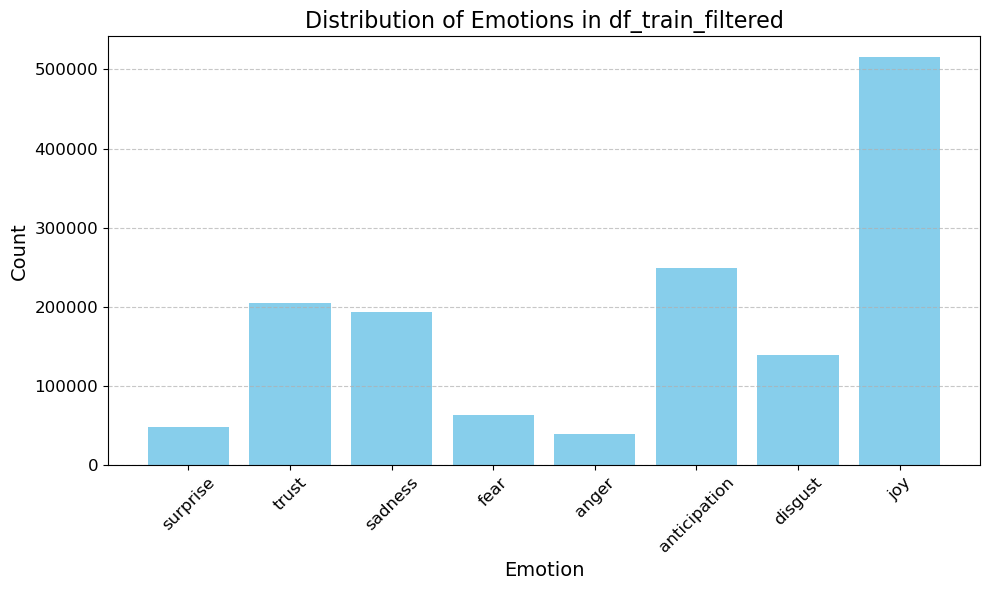

In [104]:
unique_emotions = set(df_train_filtered['emotion'])

emotion_counts = {emotion: (df_train_filtered['emotion'] == emotion).sum() for emotion in unique_emotions}

plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title('Distribution of Emotions in df_train_filtered', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As seen, the original dataset is quite umbalanced with more than 1/3 of the counts being joy. Surpirse, Fear and Anger are the least represented classes. 

There are 3 total datasets that will be used for training:
1. Original dataset as is (post cleaning)
2. Oversample the data to be used with traditional Machine learning methods
3. Undersample the data to be used with BERT models (due to long training process)

In [105]:
# For over-sampling
max_samples = df_train_filtered['emotion'].value_counts().max() # find max emotion count

oversampled_df = pd.concat([
    resample(
        df_train_filtered[df_train_filtered['emotion'] == emotion],
        replace=True,  # Allow duplication
        n_samples=max_samples,
        random_state=42
    )
    for emotion in df_train_filtered['emotion'].unique()
])

print("\nOversampled Class Distribution:")
print(oversampled_df['emotion'].value_counts())


Oversampled Class Distribution:
emotion
joy             516011
anticipation    516011
disgust         516011
trust           516011
sadness         516011
fear            516011
anger           516011
surprise        516011
Name: count, dtype: Int64


Undersample for BERT

In [106]:
# For under-sampling
min_samples = df_train_filtered['emotion'].value_counts().min() # find min emotion count

undersampled_df = pd.concat([
    resample(
        df_train_filtered[df_train_filtered['emotion'] == emotion],
        replace=False,  # No duplication
        n_samples=min_samples,  
        random_state=42 
    )
    for emotion in df_train_filtered['emotion'].unique()
])

print("\nUndersampled Class Distribution:")
print(undersampled_df['emotion'].value_counts())


Undersampled Class Distribution:
emotion
joy             39867
anticipation    39867
disgust         39867
trust           39867
sadness         39867
fear            39867
anger           39867
surprise        39867
Name: count, dtype: Int64


1.3.5 Using BERT to predict Masked Words

This undersampled data will go through further processing with BERT to predict the masked words

Reference: https://huggingface.co/docs/transformers/v4.46.3/en/model_doc/bert#transformers.BertForMaskedLM

(This was done via Kaggle notebook with GPU P100)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}") # use P100 GPU for faster processing speeds

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
mask_model = BertForMaskedLM.from_pretrained("bert-base-uncased").to(device) # For predicting [MASK]
classification_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=undersampled_df['emotion'].nunique()
).to(device)

def predict_masked_words(text, emotion):
    # concat emotion for context
    contextual_text = f"[CLS] {emotion} [SEP] {text}" # recall [CLS] marks the start and [SEP] is a new sentence

    # tokenise the text into embeddings
    tokens = tokenizer(
        contextual_text, return_tensors="pt", max_length=128, truncation=True, padding="max_length"
    ).to(device)

    with torch.no_grad():
        outputs = mask_model(**tokens)
    logits = outputs.logits # logits is the prediction

    # retrieve index of [MASK]
    mask_token_index = torch.where(tokens["input_ids"] == tokenizer.mask_token_id)[1]
    predicted_tokens = []
    for idx in mask_token_index:
        predicted_index = logits[0, idx].argmax(dim=-1).item() # predict vector
        predicted_token = tokenizer.decode([predicted_index]) # convert to word
        predicted_tokens.append(predicted_token) 

    # Replace [MASK] tokens with predictions
    for mask_token, predicted_token in zip(mask_token_index.tolist(), predicted_tokens):
        tokens["input_ids"][0, mask_token] = tokenizer.convert_tokens_to_ids(predicted_token)

    processed_text = tokenizer.decode(tokens["input_ids"][0], skip_special_tokens=True)
    
    return re.sub(r'^\w+\s*', '', processed_text) # Remove the emotion (first word)

# Preprocess training data to predict [MASK]
def prediction_BERT_train_data(df):
    processed_texts = []
    for i, row in tqdm(df.iterrows(), total=len(df), desc="Processing Training Data"):
        text = row['processed_text']
        emotion = row['emotion']
        if '[MASK]' in text:
            text = predict_masked_words(text, emotion)
        processed_texts.append(text)
    df['processed_text'] = processed_texts
    return df

undersampled_df['processed_text'] = prediction_BERT_train_data(undersampled_df)

In [ ]:
def predict_masked_words_no_emotion(text):
    contextual_text = f"[CLS] {text}"  # recall [CLS] marks the start

    # tokenise the text into embeddings
    tokens = tokenizer(
        contextual_text, return_tensors="pt", max_length=128, truncation=True, padding="max_length"
    ).to(device)
    
    with torch.no_grad():
        outputs = mask_model(**tokens)
    logits = outputs.logits # logits is the prediction

    # retrieve index of [MASK]
    mask_token_index = torch.where(tokens["input_ids"] == tokenizer.mask_token_id)[1]
    predicted_tokens = []
    for idx in mask_token_index:
        predicted_index = logits[0, idx].argmax(dim=-1).item() # predict vector
        predicted_token = tokenizer.decode([predicted_index]) # convert to word
        predicted_tokens.append(predicted_token)
    
    # Replace [MASK] tokens with predictions
    for mask_token, predicted_token in zip(mask_token_index.tolist(), predicted_tokens):
        tokens["input_ids"][0, mask_token] = tokenizer.convert_tokens_to_ids(predicted_token)

    processed_text = tokenizer.decode(tokens["input_ids"][0], skip_special_tokens=True)

    return processed_text

# Preprocess test data to predict [MASK]
def prediction_BERT_test_data(df):
    processed_texts = []
    for i, row in tqdm(df.iterrows(), total=len(df), desc="Processing test texts"):
        text = row['processed_text']
        if '[MASK]' in text:
            text = predict_masked_words_no_emotion(text)
        processed_texts.append(text)
    df['processed_text'] = processed_texts
    return df

df_test['processed_text'] = prediction_BERT_test_data(df_test)

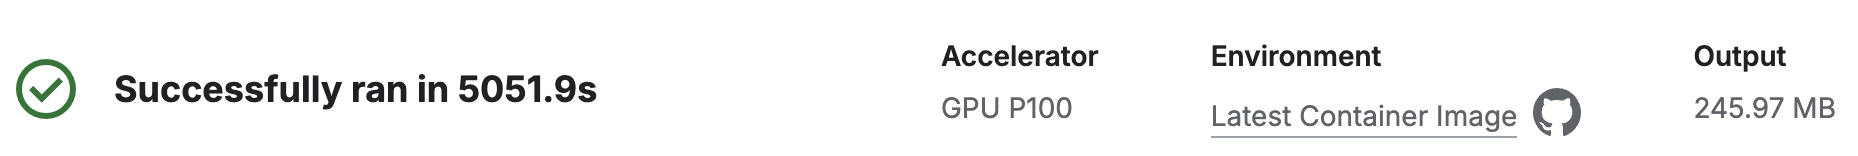

#### 1.4 Save Data (reference Lab 2)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
df_train_filtered.to_pickle("train_df_original_dist.pkl") 
oversampled_df.to_pickle("train_df_undersample.pkl") 
undersampled_df.to_pickle('train_df_undersample_BERT.pkl')
df_test.to_pickle('test_BERT.pkl')

#### 2) Machine Learning Models

#### 2.1 Naive Bayes
Using scikit-learn  ```Naive Bayes``` performs word frequency and uses these as features to train a model.  

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes was chosen as it had the best results for lab 2 master, even better than deep learning models

We will use Naive Bayes with 5 different tokenisers and compare their peformance (Please see appendix for code)
1. Bag of Words (CountVectorizer default tokenizer=None)
2. CountVectorizer(tokenizer=word_tokenize)
3. TfidfVectorizer
4. Word2Vec Tokeniser (pre-trained)
5. Word2Vec Tokeniser (custom)

In [ ]:
# 5 different tokenisers as dictionaries to iternate them
features = {
    'CountVectorizer_1': count_vector_1,
    'CountVectorizer_2 (with tokenizer)': count_vector_2,
    'TF-IDF Vectorizer': tfidf_vector,
    'Custom Word2Vec': custom_embeddings,
    'Pretrained Word2Vec': pretrained_embeddings
}

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(oversampled_df['emotion'])

# Initialize MinMaxScaler for dense embeddings
scaler = MinMaxScaler()

# Evaluate each vectorizer using Naive Bayes and 5-fold cross-validation
for name, feature in features.items():
    print(f"Evaluating: {name}")

    # Check if feature is dense or sparse
    if isinstance(feature, np.ndarray):  # Dense (e.g., Word2Vec)
        # Scale the dense embeddings to non-negative range (0 to 1)
        feature = scaler.fit_transform(feature)

    # Initialize Naive Bayes classifier
    clf = MultinomialNB()

    try:
        # Perform cross-validation
        scores = cross_val_score(clf, feature, y, cv=5, scoring='accuracy')
        print(f"{name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    except ValueError as e:
        print(f"Error with {name}: {e}")


Evaluating: CountVectorizer_1
CountVectorizer_1 - Mean Accuracy: 0.9625 ± 0.0005
Evaluating: CountVectorizer_2 (with tokenizer)
CountVectorizer_2 (with tokenizer) - Mean Accuracy: 0.9468 ± 0.0006
Evaluating: TF-IDF Vectorizer
TF-IDF Vectorizer - Mean Accuracy: 0.9416 ± 0.0007
Evaluating: Custom Word2Vec
Custom Word2Vec - Mean Accuracy: 0.6177 ± 0.0013
Evaluating: Pretrained Word2Vec
Pretrained Word2Vec - Mean Accuracy: 0.8691 ± 0.0015


In [ ]:
scaler = MinMaxScaler() # need to scale the dense vectors 

label_encoder = LabelEncoder() # encode emotions: not necessary for non-neural network but good practice
y_encoded = label_encoder.fit_transform(oversampled_df['emotion'])

# Map feature names to their corresponding training data for refitting
train_features = {
    'NB_CountVectorizer_1': count_vector_1,
    'NB_CountVectorizer_2': count_vector_2,
    'NB_TFIDF_Vectorizer': tfidf_vector,
    'NB_Pretrained_Word2Vec': scaler.fit_transform(pretrained_embeddings),
}

test_features = {
    'NB_CountVectorizer_1': vectorizer_1.transform(df_test['processed_text_no_stopwords']),
    'NB_CountVectorizer_2': vectorizer_2.transform(df_test['processed_text_no_stopwords']),
    'NB_TFIDF_Vectorizer': vectorizer_3.transform(df_test['processed_text_no_stopwords']),
    'NB_Pretrained_Word2Vec': scaler.transform(pretrained_embeddings_test), # no need to fit for test
}

for name, feature in test_features.items():
    print(f"Predicting with: {name}")

    ## build Naive Bayes model
    nb_classifier = MultinomialNB()

    ## training!
    clf.fit(train_features[name], y_encoded)
    
    ## predict!
    predictions_encoded = clf.predict(feature)
    
    # Decode predictions back to original labels
    predictions = label_encoder.inverse_transform(predictions_encoded)

    submission_df = df_test[['id']].copy()
    submission_df['emotion'] = predictions

    filename = f'BERT_Processed_Undersampled_{name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"Predictions saved to {filename}")

Predicting with: NB_CountVectorizer_1
Predictions saved to BERT_Processed_Undersampled_NB_CountVectorizer_1.csv
Predicting with: NB_CountVectorizer_2
Predictions saved to BERT_Processed_Undersampled_NB_CountVectorizer_2.csv
Predicting with: NB_TFIDF_Vectorizer
Predictions saved to BERT_Processed_Undersampled_NB_TFIDF_Vectorizer.csv
Predicting with: NB_Pretrained_Word2Vec
Predictions saved to BERT_Processed_Undersampled_NB_Pretrained_Word2Vec.csv


##### 2.2 Neural Network Model

The markdown below shows the structure of the Neural Network model. This was done by tokenising the processed_text column for the oversampled_df, which contains the most amount of data (souce of Neural Network). 

I included several dropout layers to prevent overfitting.

The accuracy for the validation set was 43.32%, which is much poorer than the 67% in section 6.5 of lab 2. This could be due to the dropout layers I added, which backfired and made the neural network model underfit.

The full code can be found in the appexdix below

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_input (<span style="color: #0087ff; text-decoration-color: #0087ff">InputLayer</span>)         │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">100</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (<span style="color: #0087ff; text-decoration-color: #0087ff">Embedding</span>)           │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">100</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)       │    <span style="color: #00af00; text-decoration-color: #00af00">23,974,656</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (<span style="color: #0087ff; text-decoration-color: #0087ff">Flatten</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">12800</span>)          │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                   │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │     <span style="color: #00af00; text-decoration-color: #00af00">1,638,528</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (<span style="color: #0087ff; text-decoration-color: #0087ff">Dropout</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                 │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │         <span style="color: #00af00; text-decoration-color: #00af00">8,256</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dropout</span>)             │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                  │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">8</span>)              │           <span style="color: #00af00; text-decoration-color: #00af00">520</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Total params: </span><span style="color: #00af00; text-decoration-color: #00af00">25,621,960</span> (97.74 MB)
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">25,621,960</span> (97.74 MB)
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Non-trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">0</span> (0.00 B)
</pre>

Validation Accuracy: 0.4332

##### 2.3 BERT Model
My best performing model involves a combination of BERT to first predict the MASK words and then using BERT to do prediction. This was run on kaggle using P100 GPU and took around 5h to complete.

Source: https://huggingface.co/docs/transformers/v4.46.3/en/model_doc/bert#transformers.BertForSequenceClassification

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

undersampled_df['emotion_encoded'] = undersampled_df['emotion'].astype('category').cat.codes
num_classes = undersampled_df['emotion_encoded'].nunique()

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(undersampled_df['emotion'].unique())
).to(device) 

# Create a class that processes the input text data and returns a dictionary with token id, attention mask and labels
class EmotionDataset(Dataset):
    def __init__(self, texts, labels=None):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            return_tensors="pt",
            max_length=128,
            padding="max_length",
            truncation=True
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        if self.labels is not None: # for test set there is no labels 
            item['labels'] = torch.tensor(self.labels[idx])
        return item

X_train, X_val, y_train, y_val = train_test_split(
    undersampled_df['processed_text'].tolist(),
    undersampled_df['emotion_encoded'].tolist(),
    test_size=0.2, # 80-20 split
    random_state=42
)

train_dataset = EmotionDataset(X_train, y_train)
val_dataset = EmotionDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

def train_model(model, train_loader, val_loader, epochs=5):
    optimizer = AdamW(model.parameters(), lr=5e-5)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in tqdm(train_loader, desc = f"Training Epoch {epoch + 1}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1} Training Loss: {total_loss / len(train_loader):.4f}")

        # vaalidation
        model.eval()
        val_preds, val_labels = [], []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                preds = torch.argmax(outputs.logits, dim=1)

                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch + 1} Validation Accuracy: {val_accuracy:.4f}")
        print(classification_report(val_labels, val_preds, target_names = undersampled_df['emotion'].unique()))

train_model(model, train_loader, val_loader, epochs=5)

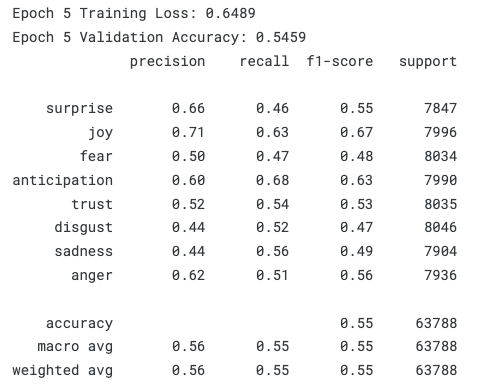

In [ ]:
# process test dataset
test_dataset = EmotionDataset(df_test['processed_text'].tolist())
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# prediction function 
def predict_test(model, test_loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Test Predictions"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            predictions.extend(preds.cpu().numpy())

    return predictions

## predict
test_predictions = predict_test(model, test_loader)

# decode back to emotion labels
df_test['predicted_emotion'] = test_predictions
df_test['predicted_emotion'] = df_test['predicted_emotion'].map(
    dict(enumerate(df_test['emotion'].astype('category').cat.categories))
)

filename = 'BERT_Processed.csv'
df_test[['id', 'predicted_emotion']].to_csv(filename, index=False)
print(f"Predictions saved to {filename}")

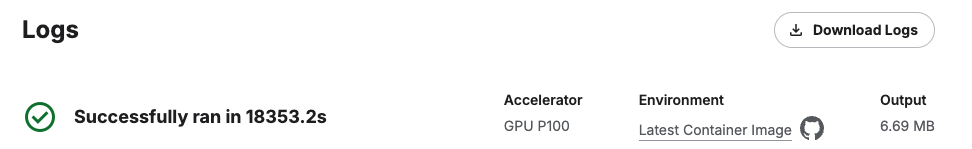

#### 3) Reflections (Insights)

The table below summarises the different methods I tried and the test results on kaggle (approximately 30% of the test data)

| **Dataset**                       | **Model**                 | **Mean Accuracy/ Validation accuracy**           | **Kaggle Results (30%)** |
|-----------------------------------|---------------------------------------|-----------------------------|---------------------|
| **Unprocessed tweets but oversampled** | Naive Bayes with CountVectorizer_1                     | 0.6390 ± 0.0005             | 0.38051             |
|                                   | Naive Bayes with CountVectorizer_2 (with tokenizer)    | 0.6516 ± 0.0007             | 0.38521             |
|                                   | Naive Bayes with TF-IDF Vectorizer                    | 0.3875 ± 0.0004             | -                   |
|                                   | Naive Bayes with Custom Word2Vec                      | 0.2849 ± 0.0005             | -                   |
| **BERT Predicted without stopwords** | Naive Bayes with CountVectorizer_1                     | **0.9625 ± 0.0005**             | 0.34657             |
|                                   | Naive Bayes with CountVectorizer_2 (with tokenizer)    | 0.9468 ± 0.0006             | -                   |
|                                   | Naive Bayes with TF-IDF Vectorizer                    | 0.9416 ± 0.0007             | -                   |
|                                   | Naive Bayes with Custom Word2Vec                      | 0.6177 ± 0.0013             | -                   |
|                                   | Naive Bayes with Pretrained Word2Vec                  | 0.8691 ± 0.0015             | 0.16906             |
| **BERT predicted with neural networks** | Neural Network with dropouts                   | 0.4332                      | 0.33328             |
| **BERT predicted with BERT model** | **BERT model**                   | 0.5459                      | **0.42903**             |


Insights gained: 

Here are the main takeaways from my experience attempting the hackathon:

1. **Discovery of <LH> as a Mask**: Realising that the <LH> token could represent a mask was a significant breakthrough. It likely contains crucial keywords directly related to emotion classification, making its prediction and handling pivotal. The inclusion of the emotions for the BertForMaskedLM model should help to provide even more context to the prediction, and it can not be done without first understanding the structure of BERT model in class.

2. **BERT Superior Performance**: The BERT model performed the best, achieving similar test and validation accuracies. This underscores BERT's ability to consider both left-to-right and right-to-left contexts, and remains a very strong benchmark for NLP standards even till today.
To further improve this model, I would:

- Clean the dataset by removing instances where identical text corresponds to different emotions (as discussed in Section 1.2.1).
- Use batching and oversampling of the orginal distribution of the data to provide a balanced, high-quality dataset, enhancing the model's ability to learn effectively.

3. **Overfitting in Naive Bayes**: The Naive Bayes model trained with BERT predictions and without stopwords overfitted the most. While it achieved a high validation accuracy, its performance on the test set was worse compared to the unprocessed tweets. This may indicate a need for regularisation strategies.

4. **Performance of Unprocessed Tweets**: Unprocessed tweets (without stopwords and <LH> removed) outperformed those with BERT-predicted tokens for the test set for naive bayes model. This could be due to:
- Random chance (though unlikely given consistent results).
- The oversampling technique reducing overfitting, leading to a model with lower validation accuracy but better generalisation to unseen test data.

5. **Neural Network Model Challenges**: The neural network model with BERT predictions performed the worst, which was unexpected. One possible improvement would be increasing the training data. However, longer training durations, like me trying to make use of the orginal distribution of text for mask prediction led to a Kaggle timeout error, limiting exploration in this area.

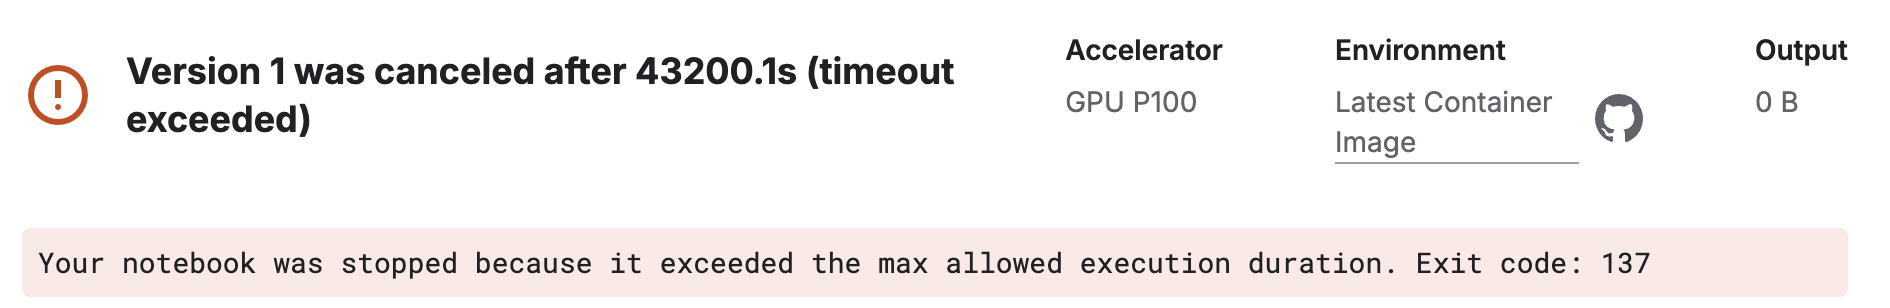

6. **Handling Large Datasets**: Dealing with large datasets highlighted the importance of using more batching to manage memory and prevent kernel crashes. Merging results post-processing can also help manage resource limitations and avoid timeout issues.

7. **Better than Random**: All my models achieved accuracies greater than 12.5%, outperforming random selection, which is an encouraging baseline comparison for evaluating model performance.

#### 4) Appendix

Code for Bag of Words (CountVectorizer default tokenizer=None)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import vstack

# build analyzers (bag-of-words)
vectorizer_1 = CountVectorizer()

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
vectorizer_1.fit(oversampled_df['processed_text_no_stopwords'])

batch_size = 10000 # we will need to do a batching else I will run out of memory :(

sparse_matrix_list = []

# 2. Batching Transform documents to document-term matrix.
for i in range(0, len(oversampled_df), batch_size):
    print(f'Batch {round(i/batch_size) + 1} of {round(len(oversampled_df) / batch_size)}')
    batch_texts = oversampled_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_vector = vectorizer_1.transform(batch_texts)  # Use transform, not fit_transform
    sparse_matrix_list.append(batch_vector)

count_vector_1 = vstack(sparse_matrix_list) # merge the batching

# observe some feature names
feature_names_1 = vectorizer_1.get_feature_names_out()

print(f"CountVectorizer Feature Names:\n{feature_names_1[:10]}")

Batch 1 of 32
Batch 2 of 32
Batch 3 of 32
Batch 4 of 32
Batch 5 of 32
Batch 6 of 32
Batch 7 of 32
Batch 8 of 32
Batch 9 of 32
Batch 10 of 32
Batch 11 of 32
Batch 12 of 32
Batch 13 of 32
Batch 14 of 32
Batch 15 of 32
Batch 16 of 32
Batch 17 of 32
Batch 18 of 32
Batch 19 of 32
Batch 20 of 32
Batch 21 of 32
Batch 22 of 32
Batch 23 of 32
Batch 24 of 32
Batch 25 of 32
Batch 26 of 32
Batch 27 of 32
Batch 28 of 32
Batch 29 of 32
Batch 30 of 32
Batch 31 of 32
Batch 32 of 32
CountVectorizer Feature Names:
['00' '000' '0000' '0000000000000001' '000001' '000005' '00009jordan'
 '0001' '0004btc' '000am']


Code for CountVectorizer(tokenizer=word_tokenize)

In [121]:
# build analyzers (bag-of-words)
vectorizer_2 = CountVectorizer(tokenizer=word_tokenize)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
vectorizer_2.fit(oversampled_df['processed_text_no_stopwords'])

batch_size = 10000 # we will need to do a batching else I will run out of memory :(

sparse_matrix_list = []

# 2. Batching Transform documents to document-term matrix.
for i in range(0, len(oversampled_df), batch_size):
    print(f'Batch {round(i/batch_size) + 1} of {round(len(oversampled_df) / batch_size)}')
    batch_texts = oversampled_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_vector = vectorizer_2.transform(batch_texts)  # Use transform, not fit_transform
    sparse_matrix_list.append(batch_vector)

count_vector_2 = vstack(sparse_matrix_list) # merge the batching

feature_names_2 = vectorizer_2.get_feature_names_out()

# observe some feature names
print(f"CountVectorizer (tokenizer=word_tokenize) Feature Names:\n{feature_names_2[:10]}")

Batch 1 of 32
Batch 2 of 32
Batch 3 of 32
Batch 4 of 32
Batch 5 of 32
Batch 6 of 32
Batch 7 of 32
Batch 8 of 32
Batch 9 of 32
Batch 10 of 32
Batch 11 of 32
Batch 12 of 32
Batch 13 of 32
Batch 14 of 32
Batch 15 of 32
Batch 16 of 32
Batch 17 of 32
Batch 18 of 32
Batch 19 of 32
Batch 20 of 32
Batch 21 of 32
Batch 22 of 32
Batch 23 of 32
Batch 24 of 32
Batch 25 of 32
Batch 26 of 32
Batch 27 of 32
Batch 28 of 32
Batch 29 of 32
Batch 30 of 32
Batch 31 of 32
Batch 32 of 32
CountVectorizer (tokenizer=word_tokenize) Feature Names:
['!' '#' '$' '%' '&' "'" "''" "'-" "'." "'07"]


Code for TfidfVectorizer

In [122]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack

vectorizer_3 = TfidfVectorizer(max_features=1000)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
vectorizer_3.fit(oversampled_df['processed_text_no_stopwords'])

batch_size = 10000 # we will need to do a batching else I will run out of memory :(

sparse_matrix_list = []

# 2. Batching Transform documents to document-term matrix.
for i in range(0, len(oversampled_df), batch_size):
    print(f'Batch {round(i/batch_size) + 1} of {round(len(oversampled_df) / batch_size)}')
    batch_texts = oversampled_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_vector = vectorizer_3.transform(batch_texts)  # Use transform, not fit_transform
    sparse_matrix_list.append(batch_vector)

tfidf_vector = vstack(sparse_matrix_list)  # merge the batching

feature_names_3 = vectorizer_3.get_feature_names_out()

# observe some feature names
print(f"Top 10 TF-IDF Features:\n{feature_names_3[:10]}")


Batch 1 of 32
Batch 2 of 32
Batch 3 of 32
Batch 4 of 32
Batch 5 of 32
Batch 6 of 32
Batch 7 of 32
Batch 8 of 32
Batch 9 of 32
Batch 10 of 32
Batch 11 of 32
Batch 12 of 32
Batch 13 of 32
Batch 14 of 32
Batch 15 of 32
Batch 16 of 32
Batch 17 of 32
Batch 18 of 32
Batch 19 of 32
Batch 20 of 32
Batch 21 of 32
Batch 22 of 32
Batch 23 of 32
Batch 24 of 32
Batch 25 of 32
Batch 26 of 32
Batch 27 of 32
Batch 28 of 32
Batch 29 of 32
Batch 30 of 32
Batch 31 of 32
Batch 32 of 32
Top 10 TF-IDF Features:
['00' '00am' '00pm' '01' '02' '03' '04' '05' '06' '07']


Code for Word2Vec Tokeniser (pre-trained)

In [128]:
from gensim.models import Word2Vec
import numpy as np

# Prepare training corpus, similar to .apply(lambda x: nltk.word_tokenize(x))
training_corpus = [text.split() for text in oversampled_df['processed_text_no_stopwords']]

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
custom_word2vec = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs, seed=42)
import numpy as np

# Function to get sentence embeddings by averaging word vectors
def get_sentence_embedding(model, sentence):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0) # we will use the mean as proposed by exercise 7
    else:
        return np.zeros(model.vector_size)

batch_size = 10000 # we will need to do a batching else I will run out of memory :(

custom_embeddings = []

# 2. Batching Transform documents to sentence vectors.
for i in range(0, len(oversampled_df), batch_size):
    print(f'Batch {round(i/batch_size) + 1} of {round(len(oversampled_df) / batch_size)}')
    batch_texts = oversampled_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_embeddings = [get_sentence_embedding(custom_word2vec, text) for text in batch_texts]
    custom_embeddings.extend(batch_embeddings)

custom_embeddings = np.array(custom_embeddings) # list -> array

print(f"Custom Word2Vec Embeddings Shape: {custom_embeddings.shape}")
# Custom Word2Vec Embeddings Shape: (4128088, 100) for oversampled data

Batch 1 of 32
Batch 2 of 32
Batch 3 of 32
Batch 4 of 32
Batch 5 of 32
Batch 6 of 32
Batch 7 of 32
Batch 8 of 32
Batch 9 of 32
Batch 10 of 32
Batch 11 of 32
Batch 12 of 32
Batch 13 of 32
Batch 14 of 32
Batch 15 of 32
Batch 16 of 32
Batch 17 of 32
Batch 18 of 32
Batch 19 of 32
Batch 20 of 32
Batch 21 of 32
Batch 22 of 32
Batch 23 of 32
Batch 24 of 32
Batch 25 of 32
Batch 26 of 32
Batch 27 of 32
Batch 28 of 32
Batch 29 of 32
Batch 30 of 32
Batch 31 of 32
Batch 32 of 32
Custom Word2Vec Embeddings Shape: (318936, 100)


Code for  Word2Vec Tokeniser (custom)

In [143]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

# Function to get sentence embeddings using pre-trained Word2Vec
def get_pretrained_embedding(model, sentence):
    vectors = [model[word] for word in sentence.split() if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

batch_size = 10000 # we will need to do a batching else I will run out of memory :(

pretrained_embeddings = []

# 2. Batching Transform documents to sentence vectors.
for i in range(0, len(oversampled_df), batch_size):
    batch_texts = oversampled_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_embeddings = [get_pretrained_embedding(w2v_google_model, text) for text in batch_texts]
    pretrained_embeddings.extend(batch_embeddings)

pretrained_embeddings = np.array(pretrained_embeddings) # list -> array

print(f"Pre-trained Word2Vec Embeddings Shape: {pretrained_embeddings.shape}")

pretrained_embeddings_test = []

# 2. Batching Transform documents to sentence vectors.
for i in range(0, len(test_df), batch_size):
    batch_texts = test_df['processed_text_no_stopwords'][i:i + batch_size]
    batch_embeddings = [get_pretrained_embedding(w2v_google_model, text) for text in batch_texts]
    pretrained_embeddings_test.extend(batch_embeddings)

pretrained_embeddings_test = np.array(pretrained_embeddings_test) # list -> array

print(f"Pre-trained Word2Vec Embeddings Shape for test: {pretrained_embeddings_test.shape}")

load ok
Pre-trained Word2Vec Embeddings Shape: (318936, 300)
Pre-trained Word2Vec Embeddings Shape for test: (411972, 300)


Code for Neural Network Model

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

## deal with label (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(oversampled_df['emotion'])
print('check label: ', label_encoder.classes_)
num_classes = len(label_encoder.classes_)

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(oversampled_df['processed_text'])
max_length = 100 # max length for padding
vocab_size = len(tokenizer.word_index) + 1

oversampled_df['processed_text_encoded'] = tokenizer.texts_to_sequences(oversampled_df['processed_text'])
X_text = pad_sequences(oversampled_df['processed_text_encoded'], maxlen=max_length, padding='post')

# One-hot encode labels
y = to_categorical(oversampled_df['emotion_encoded'], num_classes=num_classes)

X_train, X_val, y_train, y_val = train_test_split(X_text, y, test_size=0.2, random_state=42)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = Embedding(vocab_size, 128, input_length=max_length)(model_input)  # Embedding layer
X = Flatten()(X)  # Flatten embeddings

# 1st hidden layer
X_W1 = Dense(units=128)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)
H2 = Dropout(0.3)(H2) # prevent overfitting

# Output layer
H2_W3 = Dense(units=output_shape)(H2) #8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 30
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_val, y_val))
print('training finish')

# 6. Evaluate the Model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
# Tokenize the test text data
test_sequences = tokenizer.texts_to_sequences(test_df['processed_text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

## predict
pred_result = model.predict(test_padded, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

test_df['emotion'] = pred_result
output_df = test_df[['id', 'emotion']]

filename = 'NN_BERT.csv'
output_df.to_csv(filename, index=False)
print(f"Predictions saved to {filename}")